In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cmath

np.set_printoptions(threshold=784,linewidth=np.inf)

In [3]:
def standard_even(r,z):

    A = [[0 for j in range(z)] for k in range(z)]

    for i in range(z):
        for j in range(z):
            try:
                if i==j:
                    A[i][j] = (i)**2
                if abs(i-j) == 1:
                    A[i][j] = -r/2
                else:
                    None
            except:
                None

    test_A = np.array(A)
    test_A[0][1] = -r/(np.sqrt(2))
    test_A[1][0] = -r/(np.sqrt(2))

    return test_A

In [4]:
def eigenvec_even(r,z,m):

    Matrix = standard_even(r,z)
    A_eig = np.linalg.eig(Matrix)
    A_trans = np.transpose(A_eig[1])

    return A_trans[m]


In [5]:
def eigenval_even(r,z,m):

    Matrix = standard_even(r,z)
    A_eig = np.linalg.eig(Matrix)

    return A_eig[0][m]

In [6]:
r = np.linspace(0,5,200)
tau = np.linspace(0,1,200)

In [7]:
def elements(d,x,y):

    #x_trans = np.transpose(x)

    arr = np.matmul(d,y)
    arr2 = np.matmul(x,arr)

    return arr2

In [44]:
def Hamiltonian_Matrix(r,z,g,omega):

    A = [[0 for j in range(z)] for k in range(z)]

    a_up = g*elements(standard_even(0,z),eigenvec_even(r,z,0),eigenvec_even(r,z,0))
    a_down = g*elements(standard_even(0,z),eigenvec_even(r,z,1),eigenvec_even(r,z,1))
    a_diagonal = g*elements(standard_even(0,z),eigenvec_even(r,z,0),eigenvec_even(r,z,1))


    for i in range(z):
        for j in range(z):
            try:

                if i==j and j%2 == 0:
                    A[i][j] = i*omega/2 + eigenval_even(r,2,0)
                    A[i+1][j+1] = i*omega/2 + eigenval_even(r,2,1)

                if (j-i) == 2 and j%2 == 0 or j%2 == 2: #파이썬은 행렬 index가 0부터 시작함.
                    A[i][j] = a_up*np.sqrt(j/2)
                    A[i+1][j+1] = a_down*np.sqrt(j/2)
                    A[i][j+1] = a_diagonal*np.sqrt(j/2)
                    A[i+1][j] = a_diagonal*np.sqrt(j/2)

                if z%2 != 0 and i == z-2 and j == z-1 :
                    A[i][j] = a_diagonal*np.sqrt(j/2)

                else:
                    None
            except:
                None

    np_A = np.array(A)
    np_B = np.array(A)
    sum_A = np.transpose(np_B)

    for i in range(z):
        for j in range(z):
            if i == j:
                sum_A[i][j] = 0

    test_A = sum_A + np_A


    return test_A


In [47]:
Hamiltonian_Matrix(0,9,0,1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 4.]])

In [10]:
def diagonalized_Hamiltonian(r,z,g,omega):
    
    mat = [[0 for i in range(z)]for j in range(z)]

    for i in range(z):
        for j in range(z):
            if i == j:
                mat[i][j] = np.linalg.eig(Hamiltonian_Matrix(r,z,g,omega))[0][i]

    return np.array(mat)

In [11]:
def Hamiltonian_Matrix_Eigenvec(r,z,g,omega):
    return np.linalg.eig(Hamiltonian_Matrix(r,z,g,omega))[1].T

In [12]:
def pauli(x):
    sigma = [[0 for i in range(2)] for j in range(2)]

    if x == 1:
        sigma[0][1] = 1
        sigma[1][0] = 1
        return np.array(sigma)
    if x == 2: 
        sigma[0][1] = 1j
        sigma[1][0] = -1j
        return np.array(sigma)
    if x == 3:
        sigma[0][0] = 1
        sigma[1][1] = 1
        return np.array(sigma)

In [13]:
def pauli_tensorproduct(x,y):
    A = np.identity(y)

    Pauli_Tens = np.kron(A,pauli(x))

    return Pauli_Tens

In [14]:
def Spin_correlation(r,beta,tau,boson,g):

    b = beta
    t = tau

    Correlation = []
    Z = []

    Inner_e_1 = sp.linalg.expm(-b*diagonalized_Hamiltonian(r,2*boson,g,1))
    Inner_e_2 = sp.linalg.expm(t*diagonalized_Hamiltonian(r,2*boson,g,1))
    Inner_e_3 = sp.linalg.expm(-t*diagonalized_Hamiltonian(r,2*boson,g,1))

    matmul1 = np.matmul(Inner_e_3,pauli_tensorproduct(1,boson))
    matmul2 = np.matmul(pauli_tensorproduct(1,boson),matmul1)
    matmul3 = np.matmul(Inner_e_2,matmul2)
    matmul4 = np.matmul(Inner_e_1,matmul3)

    for i in range(2*boson):
        Correlation.append(elements(matmul4,Hamiltonian_Matrix_Eigenvec(r,2*boson,g,1)[i],Hamiltonian_Matrix_Eigenvec(r,2*boson,g,1)[i]))
        Z.append(sp.linalg.expm(-b*diagonalized_Hamiltonian(r,2*boson,g,1)[i][i]))

    np_Cor = np.array(Correlation)
    np_Z = np.array(Z)
    
    sum_Cor = np.sum(np_Cor)
    sum_Z = np.sum(np_Z)

    return sum_Cor/sum_Z

In [15]:
def Time(x):
    Time = []
    
    tau = np.linspace(0,1,200)

    for i in range(len(tau)):
        a = Spin_correlation(0,1,tau[i],2,x)
        Time.append(a)

    return Time

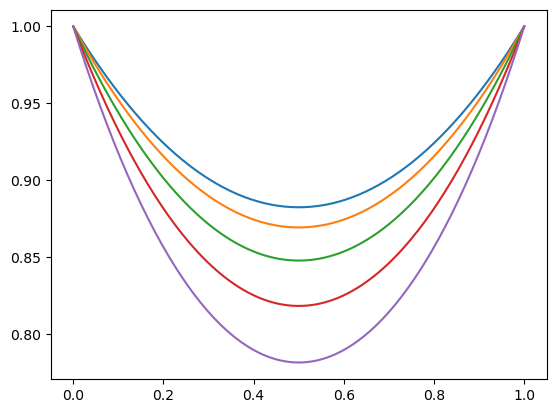

In [16]:
plt.plot(tau,Time(0.2))
plt.plot(tau,Time(0.4))
plt.plot(tau,Time(0.6))
plt.plot(tau,Time(0.8))
plt.plot(tau,Time(1))

#plt.ylim(0,1)

In [31]:
def Transformed_Function(beta,r,z,g,omega):
    Z = []
    for i in range(2*z):
        Z.append(sp.linalg.expm(-beta*diagonalized_Hamiltonian(r,2*z,g,1)[i][i]))
    
    Z = np.array(Z)
    Z_sum = np.sum(Z)

    A = [[0 for i in range(2*z)] for j in range(2*z)]
    
    for i in range(2*z):
        for j in range(2*z):
            expec = elements(pauli_tensorproduct(1,z),Hamiltonian_Matrix_Eigenvec(r,2*z,g,omega)[i],Hamiltonian_Matrix_Eigenvec(r,2*z,g,omega)[j])          
            conju = np.conjugate(expec)

            n = diagonalized_Hamiltonian(r,2*z,g,omega)[i][i]
            m = diagonalized_Hamiltonian(r,2*z,g,omega)[j][j]

            matsu_freq_boson = (2*i*np.pi)/beta

            denom =  matsu_freq_boson*j + n - m
            #sign of numerator e^E_m may can change 
            numer = np.exp(-beta*n) - np.exp(-beta*m)

            value = expec*conju*numer/(denom)

            A[i][j] = value
    np_A = np.array(A)
    sum_A = np.sum(A)

    return Z_sum

In [18]:
def Mat(r,z,i):
    Mat = []
    one = eigenvec_even(r,2*z,0)
    two = eigenvec_even(r,2*z,1)

    rix = [[elements(standard_even(r,2*z),one,one),elements(standard_even(r,2*z),one,two)],[elements(standard_even(r,2*z),two,one),elements(standard_even(r,2*z),two,two)]]
    Mat.append(rix)

    np_Mat = np.array(Mat)
    Eigenval = np.linalg.eig(np_Mat)[0][0][i]

    return Eigenval

In [19]:
def Tim_2(x,y):
    Time = []
    
    tau = np.linspace(0,10,200)

    for i in range(len(tau)):
        a = np.abs(Mat(tau[i],1,x))
        b = np.abs(Mat(tau[i],1,y))
        Time.append(a+b)

    return Time

In [106]:
t = np.linspace(0,10,200)

asdf = Mat(100,1,0)
asdff = Mat(100,1,1)

print(asdff-asdf)

141.42489172702238


In [134]:
def Spectral_Function(beta,r,z,g,omega,eta):
    Z = []
    for i in range(2*z):
        Z.append(sp.linalg.expm(-beta*diagonalized_Hamiltonian(r,2*z,g,1)[i][i]))
    
    Z = np.array(Z)
    Z_sum = np.sum(Z)

    A = [[0 for i in range(2*z)] for j in range(2*z)]
    
    for i in range(2*z):
        for j in range(2*z):
            expec = elements(pauli_tensorproduct(1,z),Hamiltonian_Matrix_Eigenvec(r,2*z,g,1)[i],Hamiltonian_Matrix_Eigenvec(r,2*z,g,1)[j])          
            conju = np.conjugate(expec)

            n = diagonalized_Hamiltonian(r,2*z,g,1)[i][i]
            m = diagonalized_Hamiltonian(r,2*z,g,1)[j][j]

            denom =  (omega + n - m)**2 + eta**2
            #sign of numerator e^E_m may can change 
            numer = np.exp(-beta*n)-np.exp(-beta*m)

            value = expec*conju*numer*2*eta/(denom)

            A[i][j] = value
            
    np_A = np.array(A)
    sum_A = np.sum(A)

    return sum_A/Z_sum

In [118]:
Spectral_Function(1,1,1,1,1,0.01)


0.024221319358196717

In [29]:
Hamiltonian_Matrix_Eigenvec(0,4,0,1)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [119]:
def output(x,y):
    A = []
    
    Om = np.linspace(0,omega,200)

    for i in range(len(Om)):
        a = Spectral_Function(beta,r,z,g,Om[i],eta)
        Omeg.append(a)
        

    return Omeg

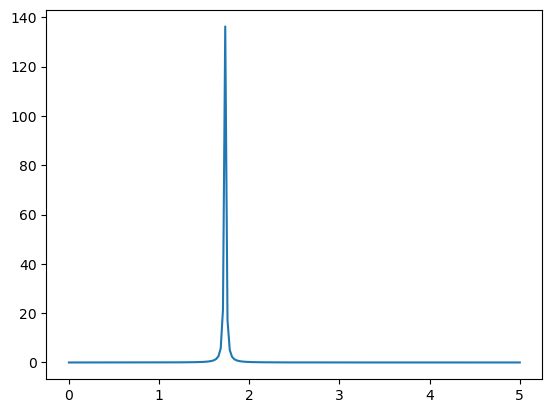

In [129]:
Om = np.linspace(0,5,200)

plt.plot(Om,omega(1,1,3,0,5,0.01))

In [135]:
sksnrl1 = Spectral_Function(1,1,2,0,1,0.01)
sksnrl2 = Spectral_Function(1,1,1,0,1,0.01)

sksnrl1/sksnrl2

1.3678794411714426

In [92]:
np.exp(-2)+np.exp(-1)

0.503214724408055